Import the required modules

In [1]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [105]:
def get_table(file, t_var):
    
  # Reads in files.
  df = pd.read_csv(file)
  # Save the target variables.
  t = df[t_var]
  # Drop target variables from df.
  df.drop(t_var, axis=1, inplace=True)
  # Create dummy variables.
  df = pd.get_dummies(df)
  # Join target variables to df
  df = pd.concat([df, t], axis=1)

  return df


In [3]:
file = ('impact1.csv', 'impact2.csv')
df = []
for f in file:
    df.append(pd.read_csv(f))
# df = get_table(file[0], ['saw', 'smaw', 'gmaw', 'gtaw']), get_table(file[1], t_var=[])
df

[    Melt Temperature  Injection Speed  Fiber Weight Fraction (wt%)  \
 0                170              130                           15   
 1                170              150                           20   
 2                170              170                           25   
 3                170              190                           30   
 4                180              130                           20   
 5                180              150                           15   
 6                180              170                           30   
 7                180              190                           25   
 8                190              130                           25   
 9                190              150                           30   
 10               190              170                           15   
 11               190              190                           20   
 12               200              130                           30   
 13   

In [4]:
def explore(df, p_end_cols, n_plots=4):
  pos = 1
  plt.figure(figsize=[15, 5])
  for i in range(0, p_end_cols):
    plt.subplot(1, n_plots, pos)
    plt.scatter(df.iloc[:, i], df.iloc[:, -1])
    plt.ylabel(df.columns[-1])
    plt.xlabel(df.columns[i])
    pos += 1
  plt.tight_layout()
  plt.show()
  print('\n')


Data Statistical Summary


,Melt Temperature (0C),Injection Speed (RPM),Injection Pressure (MPa),Cooling Time (Sec),Impact Strength (KJ/m2)
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,195.000000,160.000000,75.000000,17.500000,8.951625
std,11.547005,23.094011,11.547005,5.773503,1.201912
min,180.000000,130.000000,60.000000,10.000000,7.636000
25%,187.500000,145.000000,67.500000,13.750000,8.188750
50%,195.000000,160.000000,75.000000,17.500000,8.604000
75%,202.500000,175.000000,82.500000,21.250000,9.255250
max,210.000000,190.000000,90.000000,25.000000,12.196000




Data Visualization


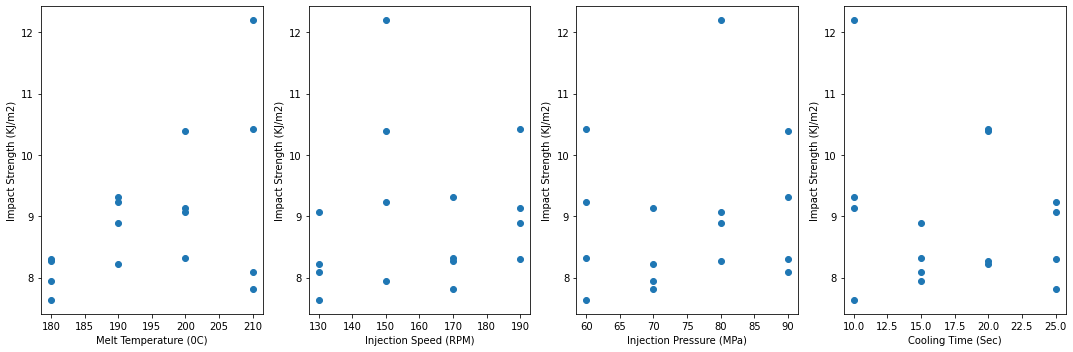

In [108]:
for x in range(2):
    print('\nData Statistical Summary')
    display(df[x].describe())
    print('')

    print('\nData Visualization')
    explore(df[x], 4)

In [109]:
def generate_train_test(df, p_end_col):
  X = df.iloc[:, :p_end_col]
  y = df.iloc[:, p_end_col]

  return train_test_split(X, y,random_state=1, test_size=0.2)

In [110]:
def scale_data(X_train, X_test):
    sc_X = StandardScaler()
    X_trainscaled=sc_X.fit_transform(X_train)
    X_testscaled=sc_X.transform(X_test)

    return X_trainscaled, X_testscaled

In [111]:
def ann_analysis():
    X_trainscaled, X_testscaled = scale_data(X_train, X_test)
    reg = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation='relu', random_state=1, max_iter=5000).fit(X_trainscaled, y_train)

    y_pred=reg.predict(X_testscaled)
    r2 = r2_score(y_pred, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    return r2, rmse, mae, y_pred, reg

In [112]:
def elm_analysis(hidden_size=5000):
  input_size = X_train.shape[1]
  hidden_size = hidden_size
  input_weights = np.random.normal(size=[input_size,hidden_size])
  biases = np.random.normal(size=[hidden_size])

  def relu(x):
    return np.maximum(x, 0, x)

  def hidden_nodes(X):
      G = np.dot(X, input_weights)
      G = G + biases
      H = relu(G)
      return H

  output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)

  def predict(X):
      out = hidden_nodes(X)
      out = np.dot(out, output_weights)
      return out

  y_pred = predict(X_test)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)

  return r2, rmse, mae, y_pred

In [113]:
def disp_matrics(r2, rmse, mae, title):
  print(title)
  print('===============================================')
  print(f'R^2:\t\t{r2}')
  print(f'rmse:\t\t{rmse}')
  print(f'mae:\t\t{mae}')
  print(f'time(s)\t\t{stop - start}')
  print('\n')

In [114]:
def disp_graphs(i, y_test, y_ann_pred, y_elm_pred):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(y_ann_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ANN')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.subplot(1, 2, 2)
  plt.scatter(y_elm_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ELM')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.suptitle('Visualizing Models Predictive Ability', x=.506, y=1.03, fontsize=16)
  plt.tight_layout()
  plt.show()

In [115]:
def disp_compare_graphs():
  plt.figure(figsize = (10, 5))

  x = np.arange(4)
  ann = [ann_r2*100, ann_rmse, ann_mae, ann_time]
  elm = [elm_r2*100, elm_rmse, elm_mae, elm_time]
  width = 0.40
    
  # plot data in grouped manner of bar type
  plt.bar(x-0.2, ann, width, color='green')
  plt.bar(x+0.2, elm, width, color='red')
  plt.xticks(x, ['R^2', 'RMSE', 'MAE', 'TIME(S)'])
  plt.title("Visualizing Models Data Metrics")
  plt.xlabel("Metrics")
  plt.ylabel("Values")
  plt.legend(["ANN", "ELM"])
  plt.show()

MODEL MATRICS.
Testing data:


,Melt Temperature (0C),Injection Speed (RPM),Injection Pressure (MPa),Cooling Time (Sec)
0,180,130,60,10
1,180,150,70,15
2,180,170,80,20
3,180,190,90,25
4,190,130,70,20
5,190,150,60,25
6,190,170,90,10
7,190,190,80,15
8,200,130,80,25
9,200,150,90,20


ANALYSIS OF FIBRE TABLE.
ANN modeling
Predicted values using ANN


array([ 1.01021364, 13.78569799,  5.28018146,  7.63131136,  1.61902921,
       15.77528843,  2.91220733, 15.21018904,  3.88216323])

The ANN model performance for testing set
R^2:		0.8773251178280154
rmse:		196.4747933095849
mae:		136.2586757876588
time(s)		8.466320514678955


ANALYSIS OF FIBRE TABLE.
ELM modeling
Predicted values using ELM


array([ 1.35435007, 18.43647362,  4.21123227,  4.62470844,  1.71356107,
       13.02400355,  2.80877268, 15.93891188,  4.30052848])

The ELM model performance for testing set
R^2:		0.9712125008110767
rmse:		96.57443040867493
mae:		65.17638407390956
time(s)		0.18927359580993652






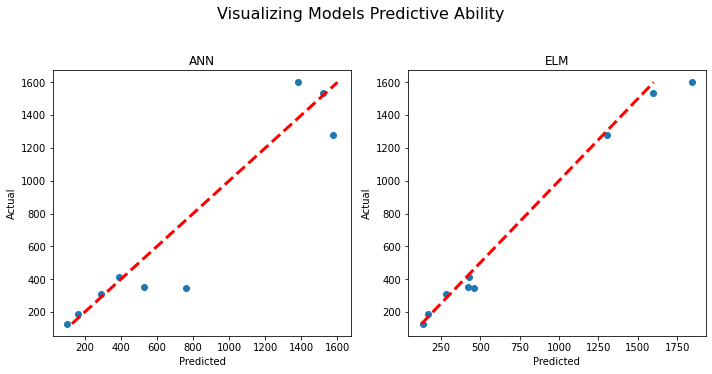

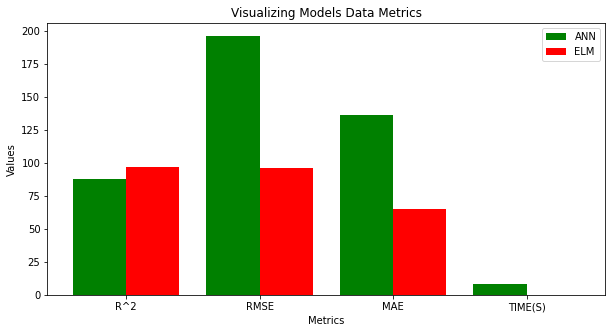

In [116]:
print('MODEL MATRICS.')
print('===============================================')

for i in range(1):
    print('Testing data:')
    display(df[1].iloc[:, :4])
    for model in ['ANN', 'ELM']:
        print(f'ANALYSIS OF FIBRE TABLE.')
        X_train, X_test, y_train, y_test = generate_train_test(df[0], -4)

        if model == 'ANN':
            print('ANN modeling')
            start = time.time()
            ann_r2, ann_rmse, ann_mae, y_ann_pred, reg = ann_analysis()
            stop = time.time()
            ann_time = stop - start

            print(f'Predicted values using ANN')
            display(y_ann_pred/100)
            disp_matrics(ann_r2, ann_rmse, ann_mae, 'The ANN model performance for testing set')
        else:
            print('ELM modeling')
            start = time.time()
            elm_r2, elm_rmse, elm_mae, y_elm_pred = elm_analysis()
            stop = time.time()
            elm_time = stop - start

            print(f'Predicted values using ELM')
            display(y_elm_pred/100)
            disp_matrics(elm_r2, elm_rmse, elm_mae, 'The ELM model performance for testing set')

    print('\n')

    disp_graphs(i, y_test, y_ann_pred, y_elm_pred)
    disp_compare_graphs()